# Basic Modeling - Project III

#### - Choosing the best model to hypertune

In [5]:
# Import Basics
import numpy as np
import pandas as pd

#Import Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Import Linear Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso, LassoCV ,Ridge, ElasticNet, LogisticRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier

# Import Optimization algorithms
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVR

# Import Data Processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, PolynomialFeatures

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector


from sklearn.naive_bayes import MultinomialNB

# NPL 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer


#scrapping 
import json

#Import graphical user info
from sklearn import set_config

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Functions

In [6]:
"""
   Function to print out score from a make_pipeline flows
       input is list of the make_pipeline var name 
"""
score_train_list = []
score_test_list = []
accuracy_score_ = []
y_preds_list = []
precision_score_ = []
recall_score_ = []
f1_score_ = []


def score_pipline(the_pipes, all_pipes_name ):
    for est,name in zip(the_pipes,all_pipes_name):
       # fit model 
        est.fit(X_train, y_train)
       # score model  
        score_test = est.score(X_test, y_test)
        score_train = est.score(X_train, y_train)
       # create preds
        y_preds= est.predict(X_test)
        accuracy_score_.append(accuracy_score(y_test, y_preds))
        precision_score_.append(precision_score(y_test, y_preds))
        recall_score_.append(recall_score(y_test, y_preds))
        f1_score_.append(f1_score(y_test, y_preds))
       # create list to export 
        score_train_list.append(score_train)
        score_test_list.append(score_test)
        y_preds_list.append(y_preds)
       # output
        print()
        print(f'--  Confusion Maxtix --   {name}')
        print(confusion_matrix(y_test, y_preds)) 
        
    data = {
        'model': all_pipes_name,
        'train score':score_train_list,
        'test score':score_test_list,
        #'y_preds':y_preds_list,
        'accuracy score': accuracy_score_,
        'precision score': precision_score_,
        'recall score' : recall_score_,
        #'f1 score':f1_score_,  
    }
    df = pd.DataFrame(data)
    #df.set_index('model', inplace = True, drop = True)
    return df

### Import DataFrame

In [7]:
df = pd.read_csv('../clean_data/clean_data.csv')

In [8]:
df.shape

(11720, 5)

### Running tests on a sample of the data

In [9]:
"""
    this creates a random sample of the data to run test on our X and y 
        before we use all the data 
"""

df_sample = df.sample(2500).copy()

In [10]:
df_sample.head()

,title,selftext,subreddit,author,max_text
11705,miles o’brian/colm meaney in ds9,was there a line in colm meaney’s contract whe...,startrek,maximus368,miles o’brian/colm meaney in ds9 was there a l...
8635,what ship is this?,saw this post on facebook. pretty sure it's a ...,startrek,KuatRZ1,what ship is this? saw this post on facebook. ...
1683,snoke is joruus c'baoth reimagined,i was just listening to the audiobook of heir ...,starwars,JamesonRH,snoke is joruus c'baoth reimagined i was just ...
10968,admiral nachav,is it just me or is admiral nachav one of the ...,startrek,Danoindigo,admiral nachav is it just me or is admiral nac...
7371,lower decks is an absolute disappointment,does it bother anyone else that the new star t...,startrek,nacespeedle,lower decks is an absolute disappointment does...


---

### Define X and y

In [11]:
#    ---_sample
X = df['max_text']

In [12]:
X.shape

(11720,)

In [13]:
# starwars = 1 -- _sample--
y = np.where(df['subreddit'] == 'starwars', 1, 0)

In [14]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
y.shape

(11720,)

In [19]:
df_sample[(df_sample['subreddit'] == 'starwars')] #.value_counts(normalize = True)

,title,selftext,subreddit,author,max_text
1683,snoke is joruus c'baoth reimagined,i was just listening to the audiobook of heir ...,starwars,JamesonRH,snoke is joruus c'baoth reimagined i was just ...
1007,a new star wars trilogy,[removed]\n\n[view poll](https://www.reddit.co...,starwars,Spennie14,a new star wars trilogy [removed]\n\n[view pol...
2583,full jedi temple map?,i was curious if we ever got a full map of the...,starwars,Zero_Runo,full jedi temple map? i was curious if we ever...
3403,the first order was never defeated and is stil...,the battle of exegol only included the final o...,starwars,Thrawn-fanboy,the first order was never defeated and is stil...
3556,is rey a skywalker or a palpatine in your opinion,[removed]\n\n[view poll](https://www.reddit.co...,starwars,Lewizzii,is rey a skywalker or a palpatine in your opin...
...,...,...,...,...,...
5644,sith and tragedies,i don't know if anyone has pointed this out be...,starwars,Galvatron64,sith and tragedies i don't know if anyone has ...
4339,episode ix: rise of skywalker,**what the fuck.** at least the other two were...,starwars,DicksUpMySlave,episode ix: rise of skywalker **what the fuck....
1546,rey and kylo-ren romantic relationship wierd?,"if palatine was kylo-ren's great grand father,...",starwars,thegrimmhealer,rey and kylo-ren romantic relationship wierd? ...
3364,which of this worlds in the galaxy would you v...,[removed]\n\n[view poll](https://www.reddit.co...,starwars,defundthecops,which of this worlds in the galaxy would you v...


---

#### Train test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =y , random_state =33)

#### baseline / Null score

In [21]:
1- y_train.sum()/len(y_train)

0.5126279863481229

#### Estimators & Vectize

In [22]:
cvect = CountVectorizer(stop_words = 'english')
tfidf = TfidfVectorizer(stop_words = 'english')

nbayes = MultinomialNB()
clf = LogisticRegression()
forest = RandomForestClassifier()
ada = AdaBoostClassifier(n_estimators=100)

### Pipelines

In [23]:
cvect_nbayes = make_pipeline(cvect, nbayes)
tfidf_nbayes = make_pipeline(tfidf, nbayes)

cvect_clf = make_pipeline(cvect, clf)
tfidf_clf = make_pipeline(tfidf, clf)

cvect_forest = make_pipeline(cvect, forest)
tfidf_forest = make_pipeline(tfidf, forest)

cvect_ada = make_pipeline(cvect, ada)
tfidf_ada = make_pipeline(tfidf, ada)

In [24]:
# list of pipelines

all_pipes = [cvect_nbayes, tfidf_nbayes,cvect_clf, tfidf_clf,cvect_forest, tfidf_forest,cvect_ada,tfidf_ada]
all_pipes_name = ['cvect_nbayes', 'tfidf_nbayes',
                  'cvect_clf', 'tfidf_clf',
                  'cvect_forest', 'tfidf_forest',
                  'cvect_ada','tfidf_ada']

### Fit & Score

In [25]:
""""
    score  - a loop to compare out of the box performence estimators
        - each estimator uses both TfidfVectorizer & CountVectorizer
        - testing 4 separate estimators
"""

df_results = score_pipline(all_pipes, all_pipes_name)


--  Confusion Maxtix --   cvect_nbayes
[[1488   14]
 [  46 1382]]

--  Confusion Maxtix --   tfidf_nbayes
[[1475   27]
 [  56 1372]]

--  Confusion Maxtix --   cvect_clf
[[1467   35]
 [  48 1380]]

--  Confusion Maxtix --   tfidf_clf
[[1483   19]
 [  56 1372]]

--  Confusion Maxtix --   cvect_forest
[[1468   34]
 [  40 1388]]

--  Confusion Maxtix --   tfidf_forest
[[1468   34]
 [  65 1363]]

--  Confusion Maxtix --   cvect_ada
[[1474   28]
 [ 126 1302]]

--  Confusion Maxtix --   tfidf_ada
[[1457   45]
 [ 119 1309]]


In [26]:
# data frame with results
#df_results.set_index('model', inplace = True, drop = True)
#df_results = df_results.T

df_results

,model,train score,test score,accuracy score,precision score,recall score
0,cvect_nbayes,0.990671,0.979522,0.979522,0.989971,0.967787
1,tfidf_nbayes,0.989192,0.971672,0.971672,0.980701,0.960784
2,cvect_clf,0.998749,0.971672,0.971672,0.975265,0.966387
3,tfidf_clf,0.992378,0.974403,0.974403,0.986341,0.960784
4,cvect_forest,1.000000,0.974744,0.974744,0.976090,0.971989
5,tfidf_forest,1.000000,0.966212,0.966212,0.975662,0.954482
6,cvect_ada,0.959954,0.947440,0.947440,0.978947,0.911765
7,tfidf_ada,0.960523,0.944027,0.944027,0.966765,0.916667


---

### Model Evaluation:

In desided on our basic model we ran a base model of Naive Bayes, Logistic Regression, Random Forest and Adaboost classifier models, each paired with TfidfVectorizer and CountVectorizer.  

We are looking to see which model has the best Accuracy and Precision.
Specifically of the subreddits that we idenified as being Starwas, how many of those did we get correct. 

Using this Rubric we found that Naive Bayes with Count Vectorizer yeilds the highest performence. 

Below are all graphs showing each model accuracy and precision score. 

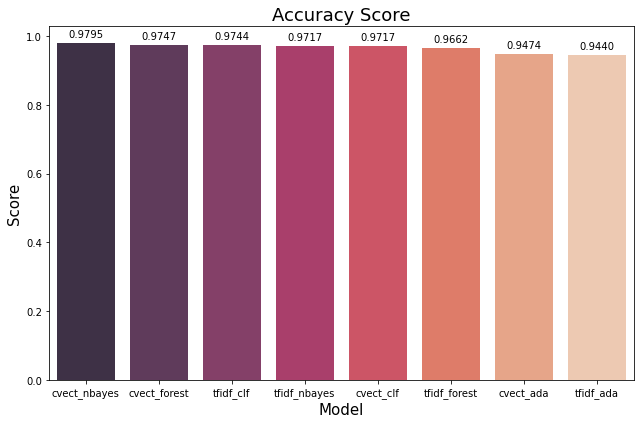

In [28]:
# Graph for Accuracy 

plt.figure(figsize = (9,6))
ax = sns.barplot(x = 'model', y='accuracy score',
                 data = df_results,
                 palette="rocket", 
                 order=df_results.sort_values('accuracy score', ascending = False).model, alpha = .9,
                )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                  (p.get_x()+ p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.xlabel("Model", size=15)
plt.ylabel("Score", size=15)
plt.title("Accuracy Score", size=18)
plt.tight_layout()


plt.savefig("../clean_data/basic_model_Accuracy_Score", dpi=100)

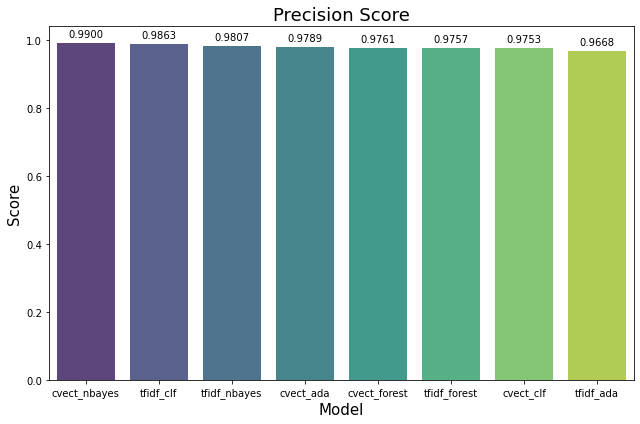

In [29]:
# Graph for Test score 

plt.figure(figsize = (9,6))
ax = sns.barplot(x = 'model', y='precision score',
                 data = df_results,
                 palette="viridis",
                 order=df_results.sort_values('precision score', ascending = False).model, alpha = .9,
                )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                  (p.get_x()+ p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.xlabel("Model", size=15)
plt.ylabel("Score", size=15)
plt.title("Precision Score", size=18)
plt.tight_layout()

plt.savefig("../clean_data/basic_model_Precision_Score", dpi=100)

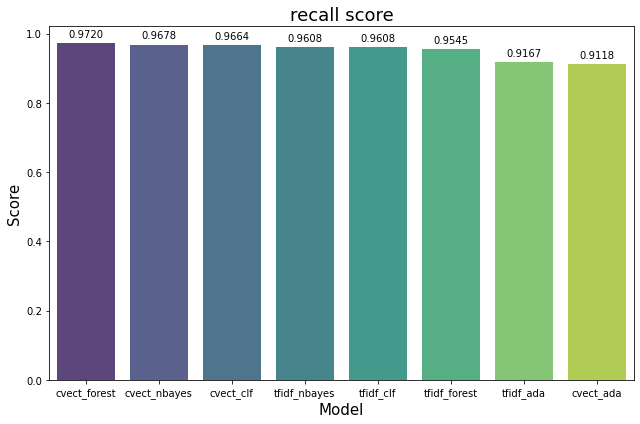

In [30]:
# Graph for Test score 

plt.figure(figsize = (9,6))
ax = sns.barplot(x = 'model', y='recall score',
                 data = df_results,
                 palette="viridis",
                 order=df_results.sort_values('recall score', ascending = False).model, alpha = .9,
                )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                  (p.get_x()+ p.get_width() / 2., p.get_height()),
                  ha = 'center', va = 'center',
                  xytext = (0,9),
                  textcoords = 'offset points')
plt.xlabel("Model", size=15)
plt.ylabel("Score", size=15)
plt.title("recall score", size=18)
plt.tight_layout()

plt.savefig("../clean_data/basic_model_Precision_Score", dpi=100)

--- 

#### Examining the Data 

Once we felt that our piplines where working well and we have cleaned out all the visable anomalies in our data, we ran all the piplines with all the data we had.  We also re-ran the piplines when we realized we should combing both 'title' + 'subtext'.


### Take aways

Both Accuracy and percision score the Naive Bayes had the highest performence,  therefore we disided to move foward with Naive base & countVectorizer as our model & vectorizer to move foward with. 